# Integration

Zhentao Shi

<!-- code is tested on SCRP -->

* Mathematically, integration and differentiation involve taking limit
* Computer is a finite-precision machin

* Numerical differentiation and integration
* Stochastic methods with examples from econometrics
  * Simulated method of moments
  * Indirect inference
* Markov Chain Monte Carlo (MCMC)


## Numerical Methods

* Numerical differentiation and integration
* Nothing to do with economics or econometrics

* To find the optimum for the objective function $f:R^K \mapsto R$
by Newton's method, 
  * $K$-dimensional gradient   
  * $K\times K$-dimensional Hessian matrix.


* Programming up the gradient and the Hessian manually is a time-consuming and error-prone job
* Whenever we change the objective function, we have to redo the gradient and Hessian

* More efficient to use numerical differentiation instead of the analytical expressions

The partial derivative of a multivariate function
$f:R^K \mapsto R$ at a point $x_0 \in R^K$ is

$$
\frac{\partial f(x)}{\partial x_k}\bigg|_{x=x_0}=\lim_{\epsilon \to 0}
\frac{f(x_0+\epsilon \cdot e_k) - f(x_0 - \epsilon \cdot e_k)}{2\epsilon},
$$

where $e_k = (0,\ldots,0,1,0,\ldots,0)$ is the identifier of the $k$-th coordinate.

* Numerical execution in a computer follows the basic definition to evaluate
$f(x_0\pm\epsilon \cdot e_k))$ with a small
$\epsilon$. 

* How small is small? Usually we try a sequence of $\epsilon$'s until
the numerical derivative is stable. 

* There are also more sophisticated algorithms.

In R, the package `numDeriv` conducts numerical differentiation, in which

* `grad` for a scalar-valued function;
* `jacobian` for a real-vector-valued function;
* `hessian` for a scalar-valued function;
* `genD` for a real-vector-valued function.

## Integration

* `integrate` carries out one-dimensional quadrature
* `adaptIntegrate` in the package `cubature` deals with multi-dimensional quadrature.


## Caution

* Numerical methods are not panacea
* Not all functions are differentiable or integrable.
* Before turning to numerical methods, it is always imperative to try to understand the behavior of the function at the first place.
* Some symbolic software, such as `Mathematica` or `Wolfram Alpha`, is a useful tool for this purpose. 
* R is weak in symbolic calculation despite the existence of a few packages for this purpose.

## Stochastic Methods

* An alternative to numerical integration is the stochastic methods.
* The underlying principle of stochastic integration is the law of large numbers.

* Let  $\int h(x) d F(x)$ be an integral where $F(x)$ is a probability distribution.
* Approximate the integral by
$\int h(x) d F(x) \approx S^{-1} \sum_{s=1}^S h(x_s)$, where $x_s$ is randomly
generated from $F(x)$.

* When $S$ is large, a law of large numbers gives

$$
S^{-1} \sum_{s=1}^S h(x_s) \stackrel{\mathrm{p}}{\to} E[h(x)] = \int h(x) d F(x).
$$

* If the integration is carried out not in the entire support of $F(x)$ but on a subset $A$, then

$$
\int_A h(x) d F(x) \approx S^{-1} \sum_{s=1}^S h(x_s) \cdot 1\{x_s \in A\},
$$

where $1\{\cdot\}$ is the indicator function.

* In theory, use an $S$ as large as possible.
* In reality, constrained by the computer's memory and computing time.
* No clear guidance of the size of $S$ in practice. 
* Preliminary experiment can help decide an $S$ that produces stable results.

* Stochastic integration is popular in econometrics and statistics, thanks to its convenience in execution.


### Example

Structural econometric estimation starts from economic principles. In an economic model,
some elements unobservable to the econometrician dictate an economic agent's decision.
[[Roy, 1951]](https://academic.oup.com/oep/article-abstract/3/2/135/2360754) proposes such a structural model with latent variables, and the Roy model is
the foundation of self-selection in labor economics.


In the original paper of the Roy model, an economic agent
must be either a farmer or a fisher.
The utility of being a farmer is $U_1^{\star} = x' \beta_1 + e_1$ and that of
being a fisher is $U_2^{\star} = x' \beta_2 + e_2$,
where $U_1^{\star}$ and $U_2^{\star}$ are latent (unobservable).
The econometrician observes the binary outcome $y=\mathbf{1}\{U_1^{\star}> U_2^{\star}\}$. If
$(e_1,e_2)$ is independent of $x$, and

$$
\begin{bmatrix}
e_1\\e_2
\end{bmatrix}
\sim N \left(
\begin{bmatrix}
0 \\ 0
\end{bmatrix},
  \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} \\ \sigma_{12} & 1
  \end{bmatrix}\right)
$$

where $\sigma_2$ is normalized to be 1, we can write down the log-likelihood as

$$
L(\theta) = \sum_{i = 1}^n  \left\{ y_i \log P( U_{i1}^{\star} > U_{i2}^{\star} )
+ (1-y_i)\log P( U_{i1}^* \leq  U_{i2}^{\star} ) \right\}.
$$

Let $\theta = (\beta_1, \beta_2, \sigma_1, \sigma_{12}).$
Given a trial value $\theta$,
we can compute

$$
p(\theta|x_i) = P\left( U^{\star}_{i1}(\theta) > U^{\star}_{i2}(\theta) \right)
= P\left( x_i'(\beta_1 - \beta_2) > e_{i2} -e_{i1} \right).
$$

Under the joint normal assumption, $e_{i2} - e_{i1} \sim N(0, \sigma_1^2 - 2\sigma_{12}+1)$ so that

$$
p(\theta|x_i) = \Phi \left(  \frac{x_i'(\beta_1 - \beta_2)}{\sqrt{\sigma_1^2 - 2\sigma_{12}+1}} \right)
$$

where $\Phi(\cdot)$ is the CDF of the standard normal.


However, notice that the analytical form depends on the joint normal assumption and cannot be
easily extended to other distributions. As long as the joint distribution of $(e_{i1}, e_{i2})$, no matter it is normal or not,
can be generated from the computer, we can use the stochastic method.
We estimate

$$
\hat{p}(\theta|x_i) = \frac{1}{S} \sum_{i=1}^S \mathbf{1}\left( U^{s*}_{i1}(\theta) > U^{s*}_{i2}(\theta) \right),
$$

where $s=1,\ldots,S$ is the index of simulation and $S$ is the total number of simulation replications.

Next, we match moments generated the theoretical model with their empirical counterparts.
The choice of the moments to be matched is to be decided by the user.
A set of valid choice for the Roy model example is

$$
\begin{align*}
g_1(\theta) & =  n^{-1} \sum_{i=1}^n x_i (y_i - \hat{p}(\theta | x_i))  \approx  0\\
g_2(\theta) & =  n^{-1} \sum_{i=1}^n (y_i - \bar{y})^2 - \bar{\hat{p}}(\theta| x_i) (1- \bar{\hat{p}}(\theta| x_i))  \approx  0\\
g_3(\theta) & =  n^{-1} \sum_{i=1}^n (x_i - \bar{x} ) (y_i - \hat{p}(\theta | x_i))^2  \approx  0
\end{align*}
$$

where $\bar{y} = n^{-1} \sum_{i=1}^n y_i$ and
$\bar{\hat{p}}(\theta) = n^{-1} \sum_{i=1}^n p(\theta|x_i)$.

The first set of moments is justified by the independence of $(e_{i1}, e_{i2})$
and $x_i$ so that $E[x_i y_i] = x_i E[y_i | x_i] = x_i p(\theta|x_i)$,
and the second set matches the variance of $y_i$.
Since the moment conditions $(g_j(\theta))_{j=1}^3$ equals the number of unknown parameters,
these moment conditions just-identifies the parameter $\theta$.
We need to come up with more moment conditions for over-identification.
Moreover, we need to choose a weighting matrix $W$ to form a quadratic criterion for GMM in
over-identification.


The above example can be viewed as an application of simulated maximum likelihood. In parallel,
we can simulate a moment condition if its explicit form is unavailable.
[[Pakes, 1989]](https://www.jstor.org/stable/1913622) provide the theoretical foundation of the
simulated method of moments (SMM).


### Indirect Inference

Indirect inference [[Smith, 1993]](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.3950080506), [[Gourieroux, 1993]](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.3950080507)
is yet another simulated-based estimation method.
Indirect inference is extensively used in structural model estimation [[Li, 2010]](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=21af27a288937ffb0753ec0f7ce40fa43fbc50aa).
Theoretical analysis of indirect inference reveals its nice properties in
bias deduction via a proper choice of the binding function [[Phillips, 2012]](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA9350).


The basic idea of indirect inference is to recover the structural parameter from
an *auxiliary model*---usually an reduced-form regression.
The reduced-form regression ignores the underlying economic structure and is a purely statistical
procedure; thus the reduced-form regression is relatively easier to implement.
A *binding function* is a one-to-one mapping from the parameter space of the reduced-form to that
of the structural form. Once the reduced-form parameter is estimated, we can recover the
structural parameter via the binding function. When the reduced-form parameter can be expressed in closed-form, we can utilize the analytical form to match the theoretical prediction and the empirical outcomes, as in [Shi, 2018](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.2640). In most cases however, the reduced-form implied by the structural model does not have a closed-form expression so simulation becomes necessary.

The choice of the auxiliary model is not unique. In the Roy model example where $\theta$ is
the structural parameter, a sensible starting point to construct the auxiliary model
is the linear regression between $y_i$ and $x_i$.
A set of reduced-form parameters can be chosen as
$\hat{b}=(\hat{b}_1,\hat{b}_2,\hat{b}_3)'$, where

$$
\begin{align}
\hat{b}_1 & =  (X'X)^{-1}X'y \\
\hat{b}_2 & =  n^{-1}\sum_{y_i=1} (y_i - x_i' b_1)^2 = n^{-1}\sum_{y_i=1} (1 - x_i' b_1)^2  \\
\hat{b}_3 & =  n^{-1}\sum_{y_i=0} (y_i - x_i' b_1)^2 = n^{-1}\sum_{y_i=0} (x_i' b_1)^2.
\end{align}
$$

Here $\hat{b}_1$ is associated with $\beta$, and $(\hat{b}_2,\hat{b}_3)$
are associated with $(\sigma_1,\sigma_{12})$.

Now we consider the structural parameter. Given a trial value $\theta$, the model
is parametric and we can simulate artificial error $(e_{i1}^*, e_{i2}^*)$ conditional
on $x_i$. In each simulation experiment,
we can decide $y_i^*$, and we can further estimate the reduced-form parameter
$\hat{b}^*=\hat{b}^*(\theta)$
given the artificial data.
$b(\theta)$ is the binding function.
 Conducting such simulation for $S$ times, we measure
the distance between $\hat{b}$ and $\hat{b}^*$ as

$$
Q(\theta) = \left(\hat{b} - S^{-1} \sum_{s=1}^S \hat{b}^*(\theta)^{s} \right)'
W \left(\hat{b} - S^{-1} \sum_{s=1}^S \hat{b}^*(\theta)^{s}\right)
$$

where $s$ indexes the simulation and $W$ is a positive definite weighting matrix.
The indirect inference estimator is $\hat{\theta} = \arg\min_{\theta} Q(\theta).$
That is, we seek the value of $\theta$
that minimizes the distance between the reduced-form parameter from the real data and that
from the simulated artificial data.

### Random Variable Generation

* If the CDF $F(X)$ is known, we can generate random variables that follow such a distribution.
  * Draw $U$ from  $\mathrm{Uniform}(0,1)$
  * Compute $X = F^{-1}(U)$

## Markov Chain Monte Carlo

* If the pdf $f(X)$ is known, we can generate a sample by *importance sampling*
  * [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm)
 (MH algorithm) is such a method.
  * MH is one of the [Markov Chain Monte Carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) methods.
* It can be implemented in the R package `mcmc`.
  * [This page](https://chi-feng.github.io/mcmc-demo/) contains demonstrative
examples of MCMC.

### Metropolis-Hastings Algorithm

* Theory of the MH requires long derivation
* Implementation is straightforward.

### Example

Use MH to generate a sample of normally distributed observations with
$\mu = 1$ and $\sigma = 0.5$.

* In the function `metrop`, we provide the logarithm of the density of

$$
\log f(x) = -\frac{1}{2} \log (2\pi) - \log \sigma - \frac{1}{2\sigma^2} (x-\mu)^2
$$

  * The first term can be omitted as it is irrelevant to the parameter.

In [ ]:
h <- function(x, mu = 1, sd = 0.5) {
  # y <- -log(sd) - (x - mu)^2 / (2 * sd^2)
  y <- log( dnorm(x, 1, 0.5) )
} # un-normalized function (doesn't need to integrate as 1)

out <- mcmc::metrop(obj = h, initial = 0, nbatch = 100, nspac = 1)

par(mfrow = c(3, 1))
par(mar = c(2, 2, 1, 1))
plot(out$batch, type = "l") # a time series with flat steps

out <- mcmc::metrop(obj = h, initial = 0, nbatch = 100, nspac = 10)
plot(out$batch, type = "l") # a time series looks like a white noise

out <- mcmc::metrop(obj = h, initial = 0, nbatch = 10000, nspac = 10)
plot(density(out$batch), main = "", lwd = 2)

xbase <- seq(-2, 2, 0.01)
ynorm <- dnorm(xbase, mean = 1, sd = 0.5)
lines(x = xbase, y = ynorm, type = "l", col = "red")


### Outcomes

* The first panel is a time series where
the marginal distribution of each observations follows $N(1,0.5^2)$. 
  * Time dependence is visible
  * flat regions are observed when the Markov chain rejects a new proposal
so the value does not update over two periods. 

* The middle panel collects the time series every 10 observations on the Markov chain
  * serial correlation is weakened
  * No flat region is observed
 
  
* The third panel compares     
  * kernel density of the simulated observations (black curve) 
  * density function of $N(1,0.5^2)$ (red curve).


### Bayesian Inference


* Bayesian framework offers a coherent and natural language for statistical decision. 
* Bayesian views both the data $\mathbf{X}_{n}$ and the
parameter $\theta$ as random variables
* Before observeing the data, researcher holds a *prior distribution* $\pi$ about $\theta$
* After observing the data, researcher updates the prior distribution to a *posterior distribution* $p(\theta|\mathbf{X}_{n})$. 


### Bayes Theorem

* Let $f(\mathbf{X}_{n}|\theta)$ be the likelihood
* Let $\pi$ be the prior

* The celebrated Bayes Theorem is

$$
p(\theta|\mathbf{X}_{n})\propto f(\mathbf{X}_{n}|\theta)\pi(\theta)
$$




### Classical Analytical Example 

* $\mathbf{X}_{n}=(X_{1},\ldots,X_{n})$ is an iid sample drawn from a normal distribution with unknown $\theta$ and known $\sigma$
* If a researcher's prior distribution
$\theta\sim N(\theta_{0},\sigma_{0}^{2})$, her posterior distribution
is, by some routine calculation, also a normal distribution

$$
p(\theta|\mathbf{x}_{n})\sim N\left(\tilde{\theta},\tilde{\sigma}^{2}\right),
$$

where
$\tilde{\theta}=\frac{\sigma^{2}}{n\sigma_{0}^{2}+\sigma^{2}}\theta_{0}+\frac{n\sigma_{0}^{2}}{n\sigma_{0}^{2}+\sigma^{2}}\bar{x}$
and
$\tilde{\sigma}^{2}=\frac{\sigma_{0}^{2}\sigma^{2}}{n\sigma_{0}^{2}+\sigma^{2}}$.


### Bayesian Credible Set

$$
\left(\tilde{\theta}-z_{1-\alpha/2}\cdot\tilde{\sigma},\ \tilde{\theta}+z_{1-\alpha/2}\cdot\tilde{\sigma}\right).
$$

* Posterior distribution depends on $\theta_{0}$ and $\sigma_{0}^{2}$
from the prior. 
* When the sample size is sufficiently, the data overwhelms the prior


### Frequentist Confidence Internval


* $\hat{\theta}=\bar{x}\sim N(\theta,\sigma^{2}/n)$. 

* Confidence interval is

$$
\left(\bar{x}-z_{1-\alpha/2}\cdot\sigma/\sqrt{n},\ \bar{x}-z_{1-\alpha/2}\cdot\sigma/\sqrt{n}\right).
$$

### Code Example

* Prior distribution $\mu \sim Beta(2,5)$

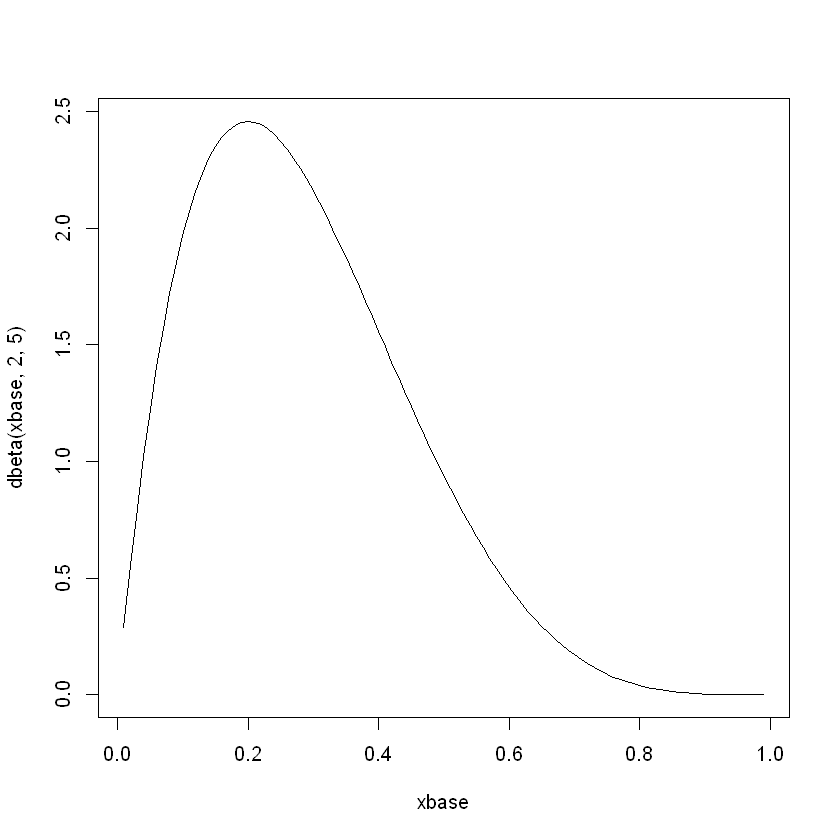

In [1]:
# prior distribution
xbase = seq(0.01, 0.99, by = 0.01)
plot( x = xbase, y = dbeta(xbase, 2, 5), type = "l" )


* The nature generates data

In [2]:
n <- 20
x <- rnorm(n) + 0.6
print(sort(x))

 [1] -0.9193307 -0.8728091 -0.5763180 -0.4738648  0.0985261  0.1003182
 [7]  0.1295708  0.1842087  0.4079465  0.6446901  0.7145792  0.9011851
[13]  1.0527561  1.1238961  1.3205115  1.3275409  1.3397570  1.3949896
[19]  1.4399837  2.7456487


* The researcher correctly specifies the normal model
* Given the data, she infers $\mu$ according to the posterior distribution

     2.5%     97.5% 
0.1176958 0.6908954 


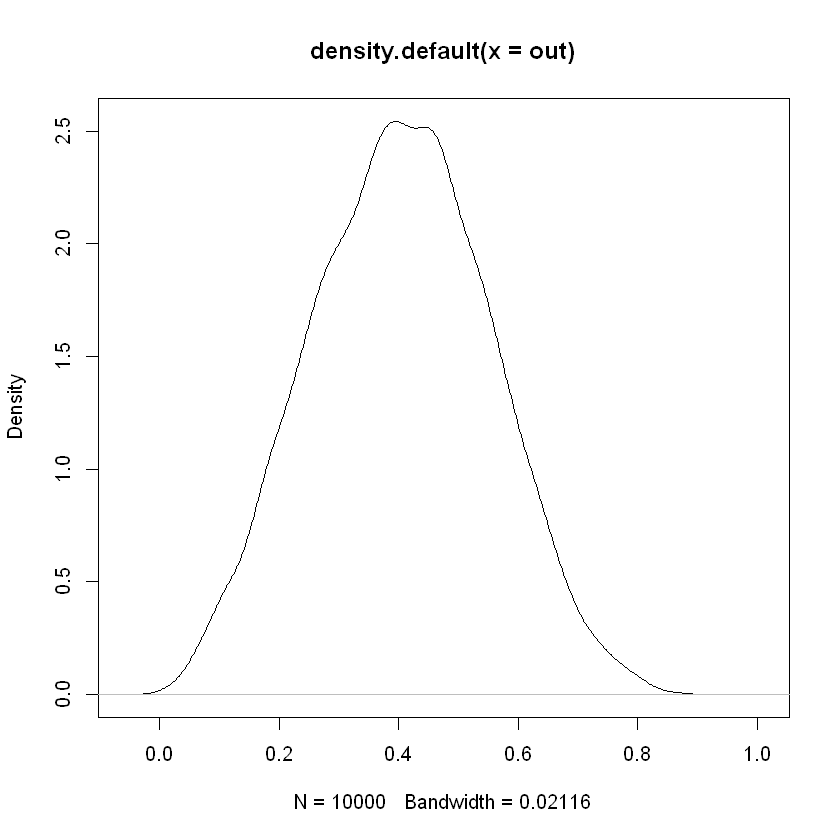

In [3]:
loglik <- function(mu) {   y <- sum( log( dnorm( x, mu, 1 ) ) ) } 

posterior <- function(mu) { loglik(mu) + log(dbeta(mu, 2, 5))  }

out <- mcmc::metrop(obj = posterior, initial = 0.1, nbatch = 10000, nspac = 10)$batch

plot(density(out))

print( quantile(out, probs = c(0.025, 0.975) ))


### Laplace-type Estimator

* Some criterion functions in econometrics is difficult to optimize
* @chernozhukov2003mcmc's *Laplace-type estimator* replaces optimization by simulation


* Let $L_n(\theta)$ be an criterion function (say, OLS, (negative) log likelihood, etc),

$$
f_n (\theta) = \frac{\exp(-L_n(\theta))\pi(\theta)}{\int_{\Theta} \exp(-L_n(\theta))\pi(\theta)}
$$

and $\pi(\theta)$ be the density of a prior.

* The smaller is the value of the objective function, the larger it weighs. 
* Exponential transformation comes from [Laplace approximation](https://en.wikipedia.org/wiki/Laplace's_method).




* Use MCMC to simulate the distribution of $\theta$.
* For a linear regression model, the code block compares the OLS estimator with the LTE estimator 

In [4]:
library(magrittr)

# DGP
n <- 100
b0 <- c(.1, .1)
X <- cbind(1, rnorm(n))
Y <- X %*% b0 + rnorm(n)

In [10]:
# Laplace-type estimator
# L <- function(b) -0.5 * sum((Y - X %*% b)^2) - 0.5 * crossprod(b - c(0, 0))
# notice the "minus" sign of the OLS objective function
# here we use a normal prior around (0,0) with var 1

# L <- function(b) -0.5*sum((Y - X %*% b)^2) # flat prior

nbatch <- 10000
out <- mcmc::metrop(obj = L, initial = c(0, 0), nbatch = nbatch, nspac = 20)$batch

# summarize the estimation
bhat2 <- out[-(1:round(nbatch / 10)), 2] # remove the burn in
bhat2_point <- mean(bhat2)
bhat2_sd <- sd(bhat2)
bhat2_CI <- quantile(bhat2, c(.025, .975))

# report results
print(cat(
  "The posterior mean =", bhat2_point, " sd = ", bhat2_sd,
  " \n and C.I.=(", bhat2_CI, ")"
))

# plot(density(bhat2), main = "posterior from normal prior")

The posterior mean = 0.2172337  sd =  0.09317524  
 and C.I.=( 0.04068696 0.4020617 )NULL


In [11]:
# OLS estimation

b2_OLS <- (lm(Y ~ -1 + X) %>% summary() %>% coef())[2, ]
# "-1" in lm( ) because X has contained intercept
print(cat(
  "The OLS point est =", b2_OLS[1], " sd = ", b2_OLS[2],
  " \n and C.I.=(", c(b2_OLS[1] - 1.96 * b2_OLS[2], b2_OLS[1] + 1.96 * b2_OLS[2]), ")"
))

The OLS point est = 0.2207185  sd =  0.1091048  
 and C.I.=( 0.006873182 0.4345639 )NULL


## Reading

* @li2010indirect
* Peng (2018), [Advanced Statistical Computing](https://bookdown.org/rdpeng/advstatcomp/), Ch. 5, Ch. 7.1-2